In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

In [9]:
# Reading the results file
from ema_workbench import load_results
file_name = 'badscenario_randompolicy_locations.tar.gz'
results = load_results(file_name)
# Extracting experiment and outcomes from results
experiments, outcomes = results

4000 randomly generated policies with 1 scenarios with high Bmax

In [11]:
experiments

,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.1_Brate,A.2_Bmax,A.2_pfail,A.2_Brate,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,3.5,3.5,3.5,4.0,350.0,0.5,1.5,350.0,0.5,1.5,...,0.0,0.0,5.0,5.0,3.0,4.0,4.0,reference,19,dikesnet
1,3.5,3.5,3.5,4.0,350.0,0.5,1.5,350.0,0.5,1.5,...,7.0,9.0,6.0,6.0,2.0,6.0,2.0,reference,20,dikesnet
2,3.5,3.5,3.5,4.0,350.0,0.5,1.5,350.0,0.5,1.5,...,4.0,3.0,10.0,7.0,10.0,2.0,0.0,reference,21,dikesnet
3,3.5,3.5,3.5,4.0,350.0,0.5,1.5,350.0,0.5,1.5,...,4.0,8.0,5.0,2.0,5.0,4.0,4.0,reference,22,dikesnet
4,3.5,3.5,3.5,4.0,350.0,0.5,1.5,350.0,0.5,1.5,...,9.0,8.0,4.0,1.0,6.0,6.0,3.0,reference,23,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3.5,3.5,3.5,4.0,350.0,0.5,1.5,350.0,0.5,1.5,...,5.0,10.0,0.0,4.0,8.0,2.0,3.0,reference,4014,dikesnet
3996,3.5,3.5,3.5,4.0,350.0,0.5,1.5,350.0,0.5,1.5,...,1.0,4.0,1.0,1.0,8.0,1.0,3.0,reference,4015,dikesnet
3997,3.5,3.5,3.5,4.0,350.0,0.5,1.5,350.0,0.5,1.5,...,1.0,2.0,5.0,6.0,5.0,2.0,3.0,reference,4016,dikesnet
3998,3.5,3.5,3.5,4.0,350.0,0.5,1.5,350.0,0.5,1.5,...,6.0,10.0,3.0,1.0,4.0,1.0,0.0,reference,4017,dikesnet


In [12]:
for col in experiments.columns:
    print(col)

discount rate 0
discount rate 1
discount rate 2
A.0_ID flood wave shape
A.1_Bmax
A.1_pfail
A.1_Brate
A.2_Bmax
A.2_pfail
A.2_Brate
A.3_Bmax
A.3_pfail
A.3_Brate
A.4_Bmax
A.4_pfail
A.4_Brate
A.5_Bmax
A.5_pfail
A.5_Brate
0_RfR 0
0_RfR 1
0_RfR 2
1_RfR 0
1_RfR 1
1_RfR 2
2_RfR 0
2_RfR 1
2_RfR 2
3_RfR 0
3_RfR 1
3_RfR 2
4_RfR 0
4_RfR 1
4_RfR 2
A.1_DikeIncrease 0
A.1_DikeIncrease 1
A.1_DikeIncrease 2
A.2_DikeIncrease 0
A.2_DikeIncrease 1
A.2_DikeIncrease 2
A.3_DikeIncrease 0
A.3_DikeIncrease 1
A.3_DikeIncrease 2
A.4_DikeIncrease 0
A.4_DikeIncrease 1
A.4_DikeIncrease 2
A.5_DikeIncrease 0
A.5_DikeIncrease 1
A.5_DikeIncrease 2
EWS_DaysToThreat
scenario
policy
model


In [13]:
cleaned_experiments = experiments.drop(experiments.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,-1,-2,-3]], axis = 1)

In [14]:
cleaned_experiments

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,10.0,0.0,4.0,0.0,0.0,5.0,5.0,3.0,4.0,4.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,4.0,4.0,7.0,9.0,6.0,6.0,2.0,6.0,2.0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,2.0,0.0,5.0,4.0,3.0,10.0,7.0,10.0,2.0,0.0
3,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,8.0,0.0,8.0,4.0,8.0,5.0,2.0,5.0,4.0,4.0
4,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,5.0,0.0,1.0,9.0,8.0,4.0,1.0,6.0,6.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,9.0,6.0,2.0,5.0,10.0,0.0,4.0,8.0,2.0,3.0
3996,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,5.0,5.0,1.0,4.0,1.0,1.0,8.0,1.0,3.0
3997,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,9.0,1.0,2.0,5.0,6.0,5.0,2.0,3.0
3998,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3.0,1.0,4.0,6.0,10.0,3.0,1.0,4.0,1.0,0.0


In [15]:
outcomes

{'A.1 Total Costs': array([2.79270943e+08, 2.32328289e+08, 1.88303188e+08, ...,
        2.37823243e+08, 4.78479480e+07, 9.52139873e+07]),
 'A.1_Expected Annual Damage': array([2.79270943e+08, 2.32328289e+08, 1.88303188e+08, ...,
        2.37823243e+08, 4.78479480e+07, 9.52139873e+07]),
 'A.1_Expected Number of Deaths': array([0., 0., 0., ..., 0., 0., 0.]),
 'RfR Total Costs': array([6.7380e+08, 1.3362e+09, 1.0957e+09, ..., 5.0990e+08, 6.5650e+08,
        1.0494e+09]),
 'Expected Evacuation Costs': array([ 662.73471057,  228.28122565,    0.        , ..., 1915.95549022,
           0.        ,    0.        ]),
 'A.2 Total Costs': array([2.16408305e+08, 2.40508849e+08, 2.51035398e+08, ...,
        1.08083458e+08, 2.04961830e+08, 2.54143397e+08]),
 'A.2_Expected Annual Damage': array([2.16408305e+08, 2.40508849e+08, 2.51035398e+08, ...,
        1.08083458e+08, 2.04961830e+08, 2.54143397e+08]),
 'A.2_Expected Number of Deaths': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.3 Total Costs': array(

In [16]:
df_outcomes = pd.DataFrame.from_dict(outcomes)

In [17]:
df_outcomes

,A.1 Total Costs,A.1_Expected Annual Damage,A.1_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,A.2 Total Costs,A.2_Expected Annual Damage,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Annual Damage,A.3_Expected Number of Deaths
0,2.792709e+08,2.792709e+08,0.0,6.738000e+08,662.734711,2.164083e+08,2.164083e+08,0.000000,8.116230e+07,8.116230e+07,0.000000
1,2.323283e+08,2.323283e+08,0.0,1.336200e+09,228.281226,2.405088e+08,2.405088e+08,0.000000,6.178218e+07,6.178218e+07,0.001685
2,1.883032e+08,1.883032e+08,0.0,1.095700e+09,0.000000,2.510354e+08,2.510354e+08,0.000000,5.296797e+07,5.296797e+07,0.000000
3,1.124550e+08,1.124550e+08,0.0,9.701000e+08,0.000000,2.893240e+08,2.893240e+08,0.000000,8.606854e+07,8.606854e+07,0.000000
4,1.593346e+08,1.593346e+08,0.0,1.767400e+09,185.295313,1.819861e+08,1.819861e+08,0.000403,5.281117e+07,5.281117e+07,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
3995,1.257972e+08,1.257972e+08,0.0,6.138000e+08,577.394297,6.205460e+07,6.205460e+07,0.001205,1.197899e+08,1.197899e+08,0.000000
3996,2.819751e+08,2.819751e+08,0.0,1.598200e+09,284.078722,2.357555e+08,2.357555e+08,0.000000,9.054323e+07,9.054323e+07,0.001374
3997,2.378232e+08,2.378232e+08,0.0,5.099000e+08,1915.955490,1.080835e+08,1.080835e+08,0.000000,1.047237e+08,1.047237e+08,0.009436
3998,4.784795e+07,4.784795e+07,0.0,6.565000e+08,0.000000,2.049618e+08,2.049618e+08,0.000000,7.685168e+07,7.685168e+07,0.000000


In [29]:
np.percentile(data, 90)

0.0026634540907117684

In [66]:
from ema_workbench.analysis import prim

data = df_outcomes["A.3_Expected Number of Deaths"]

y_deaths_A3 = data == 0

prim_alg = prim.Prim(cleaned_experiments,y_deaths_A3, threshold=0.8, peel_alpha=0.01)
box1 = prim_alg.find_box()

In [67]:
box1.inspect_tradeoff()

alt.VConcatChart(...)

coverage    0.944927
density     0.964853
id                 2
mass           0.818
mean        0.964853
res_dim            1
Name: 2, dtype: object

                   box 2                                       
                     min   max                        qp values
A.3_DikeIncrease 0   1.5  10.0  [1.1350489081722652e-122, -1.0]



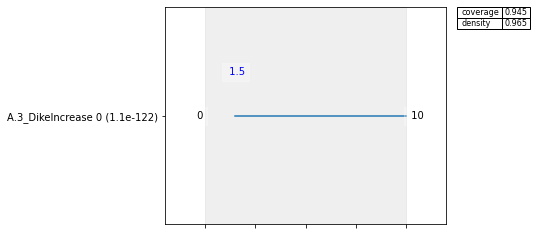

In [58]:
box1.inspect(2)
box1.inspect(2, style='graph')
plt.show()

AttributeError: 'PairGrid' object has no attribute 'set_size_inches'

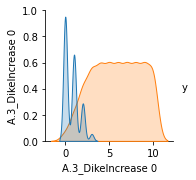

In [59]:
box1.select(2)
fig = box1.show_pairs_scatter()
fig.set_size_inches((12,12))
plt.show()

In [60]:
from ema_workbench.analysis import dimensional_stacking

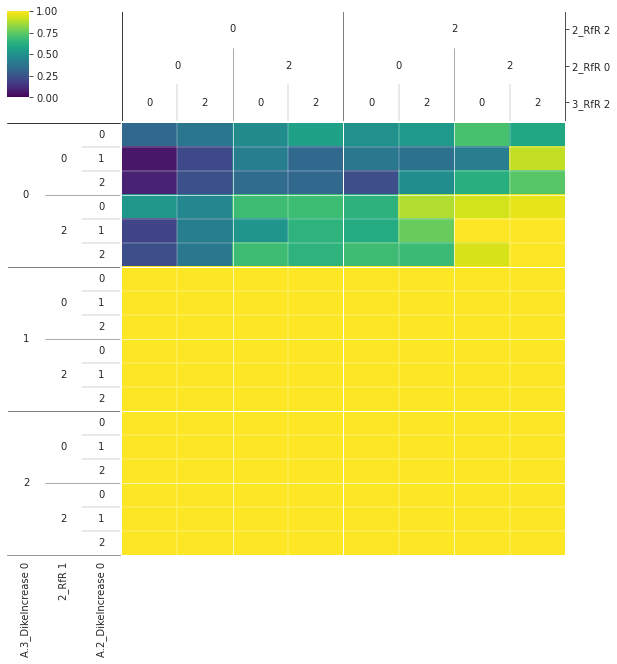

In [61]:
dimensional_stacking.create_pivot_plot(cleaned_experiments, y_deaths_A3)
plt.show()

lots of empty spaces and thus we need more experiments

In [62]:
from ema_workbench.analysis import prim

data = df_outcomes["A.1_Expected Annual Damage"]

y_damage_A1 = data < np.percentile(data, 30)

prim_alg = prim.Prim(cleaned_experiments,y_damage_A1, threshold=0.8, peel_alpha=0.05)
box2 = prim_alg.find_box()

In [63]:
box2.inspect_tradeoff()

alt.VConcatChart(...)

coverage    0.506667
density     0.829468
id                14
mass         0.18325
mean        0.829468
res_dim            3
Name: 14, dtype: object

                   box 14                                     
                      min  max                       qp values
A.1_DikeIncrease 0    0.0  4.5  [-1.0, 1.4510380328684853e-62]
A.1_DikeIncrease 1    0.0  6.5  [-1.0, 3.9048498143826304e-30]
A.1_DikeIncrease 2    0.0  6.5  [-1.0, 1.0760045214406188e-23]



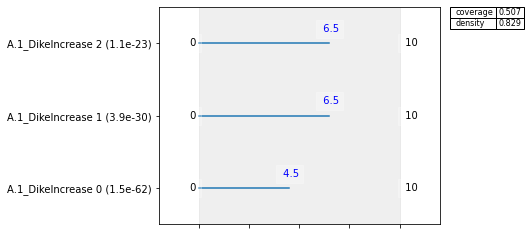

In [64]:
box2.inspect(14)
box2.inspect(14, style='graph')
plt.show()

AttributeError: 'PairGrid' object has no attribute 'set_size_inches'

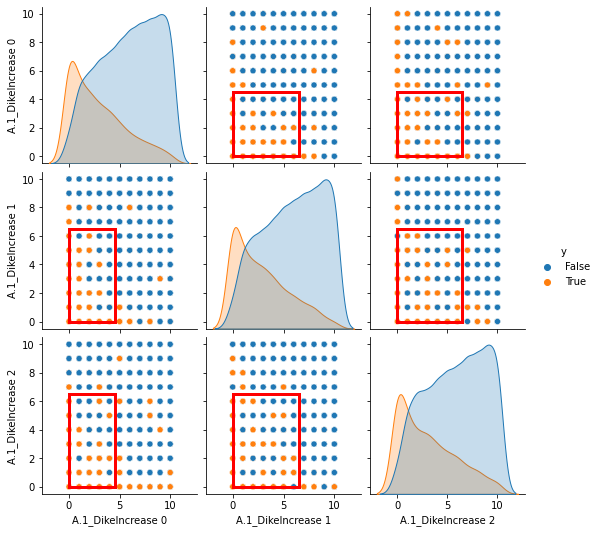

In [65]:
box2.select(14)
fig = box2.show_pairs_scatter()
fig.set_size_inches((12,12))
plt.show()

In [ ]:
dimensional_stacking.create_pivot_plot(cleaned_experiments, y_damage_3)
plt.show()

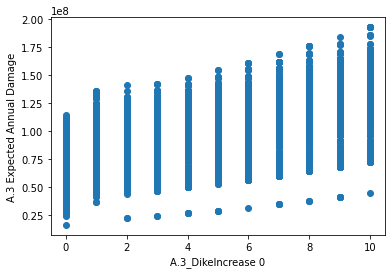

In [70]:
import matplotlib.pyplot as plt
plt.scatter(experiments["A.3_DikeIncrease 0"],df_outcomes["A.3_Expected Annual Damage"])
plt.ylabel('A.3 Expected Annual Damage')
plt.xlabel('A.3_DikeIncrease 0')
plt.show()

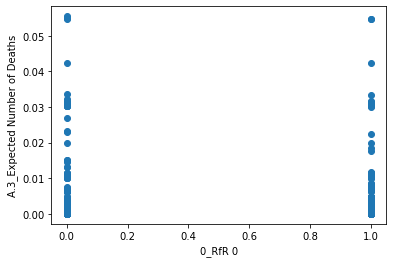

In [60]:
import matplotlib.pyplot as plt
plt.scatter(experiments["1_RfR 0"],df_outcomes["A.3_Expected Number of Deaths"])
plt.ylabel('A.3_Expected Number of Deaths')
plt.xlabel('0_RfR 0')
plt.show()

In [52]:
from ema_workbench.analysis import prim

data = df_outcomes["A.5_Expected Number of Deaths"]

y3 = data <= np.percentile(data, 10)

prim_alg = prim.Prim(cleaned_experiments,y3, threshold=0.8, peel_alpha=0.01)
box3 = prim_alg.find_box()

In [53]:
box3.inspect_tradeoff()

alt.VConcatChart(...)

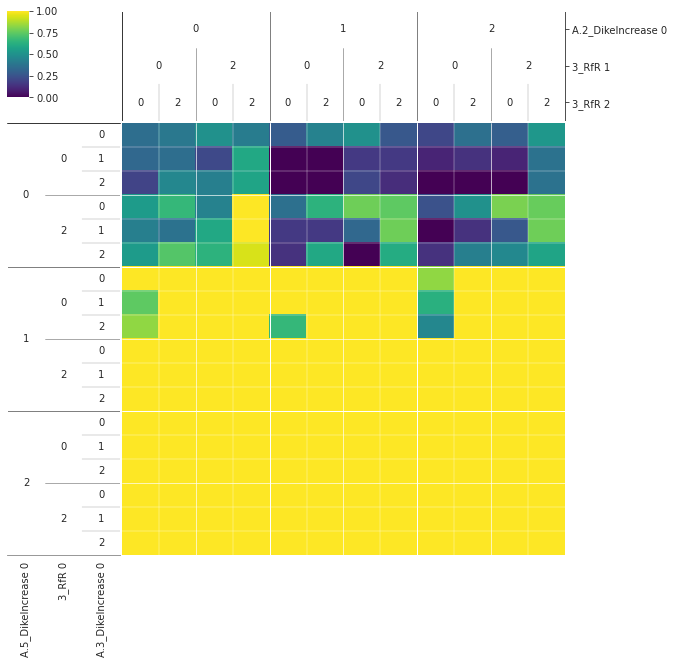

In [54]:
dimensional_stacking.create_pivot_plot(cleaned_experiments, y3)
plt.show()